In [1]:
import numpy as np
import matplotlib.pyplot as plt

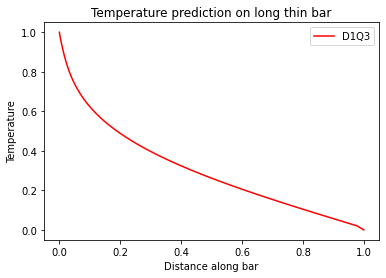

In [4]:
##Number of lattice nodes
Nx=50
##Macroscopic property
T=np.zeros((Nx))
##Temperature at left boundary
Tl=1
##Temperature at right boundary
Tr=0
T[0]=Tl
T[Nx-1]=Tr
##weights of digital particles
w1=1/2
w2=1/2
omega=1.5
##particle velocity distribution function
f1=np.zeros((Nx))
f2=np.zeros((Nx))
##post collision vdf
f1c=np.zeros((Nx))
f2c=np.zeros((Nx))
##Compute equilibrium vdf
f1eq=w1*T
f2eq=w2*T
##Initiliazation 
f1=f1eq
f2=f2eq
##collision at lattice nodes
for i in np.arange(1,Nx-1):
    f1c[i]=f1[i]+omega*(f1eq[i]-f1[i])
    f2c[i]=f2[i]+omega*(f2eq[i]-f2[i])
##Boundary lattice nodes
f1c[0]=f1[0]
f2c[0]=f2[0]
f1c[Nx-1]=f1[Nx-1]
f2c[Nx-1]=f2[Nx-1]
##Streaming of digital particles
for i in np.arange(0,Nx-1):
    f1[i+1]=f1c[i]

for i in np.arange(0,Nx-1):
    f2[i]=f2c[i+1]

##Boundary conditions
##left boundary 
f1[0]=Tl-f2[0]
##Right boundary
f2[Nx-1]=Tr-f2[Nx-1]
##Macroscopic property
for i in np.arange(1,Nx-1):
    T[i]=f1[i]+f2[i]
   
iter=1000
while(iter>=1):
    ##Compute equilibrium vdf
    f1eq=w1*T
    f2eq=w2*T
    ##collision at lattice nodes
    for i in np.arange(1,Nx-1):
        f1c[i]=f1[i]+omega*(f1eq[i]-f1[i])
        f2c[i]=f2[i]+omega*(f2eq[i]-f2[i])
    ##Boundary lattice nodes
    f1c[0]=f1[0]
    f2c[0]=f2[0]
    f1c[Nx-1]=f1[Nx-1]
    f2c[Nx-1]=f2[Nx-1]
    ##Streaming of digital particles
    for i in np.arange(0,Nx-1):
        f1[i+1]=f1c[i]

    for i in np.arange(0,Nx-1):
        f2[i]=f2c[i+1]


    ##Boundary conditions
    ##left boundary 
    f1[0]=Tl-f2[0]
    ##Right boundary
    f2[Nx-1]=Tr-f2[Nx-1]
    ##Macroscopic property
    for i in np.arange(1,Nx-1):
        T[i]=f1[i]+f2[i]
        
    iter=iter-1   
##Plotting 
x=np.linspace(0,1,Nx)
plt.plot(T,x,color='red',label='D1Q3')
plt.xlabel('Distance along bar')
plt.ylabel('Temperature')
plt.title('Temperature prediction on long thin bar')
plt.legend()
plt.show()